# Motivation
COVID-19 has been drastically changing the world during the past year. Throughout all the countries suffering from the pandemics, some countries dealt with it well by enforcing people wearing masks and social distancing, starting from the early stage of the pandemic. Therefore, we would like to model the pandemic to understand the behavior of the virus on human beings through compartmental models such as SIR/SEIR/SEIRD with the topological interaction via Cellular Automata (CA) [9] and then to study the influence of masks/vaccine/social distancing on controlling the outbreak with Agent-Based Model (ABM) [1] [3].

# Introduction
To simulate models in epidemiology, compartmental models were commonly implemented to represent how individuals in a different state in a population interaction [5]. 
1. SIR <br/>
   The SIR model divides the total population size at time t denoted as P(t) into Susceptible S(t), Infectious I(t) and Recovered R(t). Hence, for the total population we can get P(t) = S(t) + I(t) + R(t).

2. SEIR <br/>
   The SEIR model considers an additional factor, Exposed E(t), based on the basic SIR model. That is, a person in the susceptible condition will first be exposed before infectious. Compared with SIR, SEIR accords more with reality. Hence, for the total population we can get P(t) = S(t) + E(t) + I(t) + R(t).
   
3. SEIRD <br/>
   In order to stimulate the real Covid-19 situation, we need to include the death population into our model. Therefore, we implement the SEIRD model which takes Death D(t) into consideration and we can get P(t) = S(t) + E(t) + I(t) + R(t) + D(t).

In order to model the interaction throughout people during the pandemics, a regular grid of identical was implemented as the topology during the modeling interaction. In the first stage of the program, Cellular Automata is implemented with the compartmental models above as the simple modeling where each cell represents as people. The neighboring cells provide an interaction for spreading the virus in the system. In the second stage of the model, we build an Agent-based Model on top of the grid topology to execute a more sophisticated simulation to study the influence of personal protected equipment and social distancing on the pandemics. 

1. Cellular Automata (CA) <br/>
   A Cellular Automata is a discrete model of computation studied in automata theory. It consists of a regular grid of cells, and it can be in any dimension. To do the simulation, an initial state will be given to each cell (time t=0). Then, while a new generation is created, each cell will be assigned a new state based on a fixed rule from the designer. Eventually, the grid of the cellular automata will show the final result of each cell's status after several iterations.

2. Agent-Based Model (ABM) <br/>
   ABM simulates the actions of the interactions of autonomous agents, environments, and time evolution.  
   - Agents represent individual or collective entities such as a person or organization. Each agent has its own independent characteristics, deciding the agent's behavior, goals, locations in the simulation.
   - Environments are the space where agents exist and interact with other agents. In ABM, the topological information differs from the case by case. In this project, we implement a grid similar to Cellular Automata as the topology of the interaction, but Network Interaction could also be implemented as environments in ABM.
   - Time contributes the "dynamic" to the simulation. During ABM simulation, it will go through a number of time steps where agents and environments update the states/characteristics. 


**Group 84**\
**Team member:**\
**Yeong Jer Tseng (ytseng35)\
Ting Liao (tliao32)\
Po Hsien Hsu (phsu40)**\

# Methods
* Stage One - Cellular Automata
  - Compartmental Models: SIR/SEIR/SEIRD
  - CA Components: 
    1. Cell <br/>
      Each cell represents a person object with attributes to keep track of the compartmental states, e.g., 0: Susceptible, 1: Infectious.
    2. Time (Day-Based) <br/>
      The dynamic system in CA will be updated on a daily basis.
  - CA Rule:
    - Initially, we randomly assigned the Susceptible status to some grids. 
    - For SIR:
      - Susceptible status will become Infectious based on the infectious rate
      - Infectious status will become Recovered based on the recovered rate
    - For SEIR:
      - Susceptible status will become Exposed based on the infectious rate
      - Exposed status will become Infectious based on the latent diseased rate
      - Infectious status will become Recovered based on the recovered rate
    - For SEIRD:
      - Susceptible status will become Exposed based on the infectious rate
      - Exposed status will become Infectious based on the latent diseased rate
      - Infectious status will become Recovered based on the recovered rate or Died based on the death rate

* Stage Two - Agent-Based Model (Anticipated)
  - Compartmental Models: SEIRD
  - ABM Components: 
      1. Agents <br/>
        The agents within our ABM would mainly be composed of 3 types: Person, Family, and Company. Each Person would represent each individuals within our simulation. While the Family and Company would represent collections of multiple persons that either has the same home location or office location. These collections and associations would affect each individuals Environments.<br/>
        - Person: 
          - Attribute: id (unique; int), state (dict(0: Susceptibe, 1: Exposed, 2: Infected, 3: Recovered, 4: Dead)), grid_location (tuple(x, y)), wear_mask (boolean), vaccinated (boolean), hospitalized (boolean)
        - Family: 
          - Attribute: People (list(id)), grid location (tuple(x, y))
        - Company:
          - Attribute: People (list(id)), grid location (tuple(x, y))

      2. Environments<br/>
        For the environment or in another way the landscape of our simulation, we adopted a more simplify 2D-square grid topology. There would be 4 types of environments a Person (individual) could be located on the grid: House, Hospital, Office, or on their commuting path. The reason we chose a square over a hex representation for our grid was to first have a more simple behavior, so we could understand the results. In terms of future work, we might be adopting a hex grid.<br/>
        - Grid Topology (2D-Square)
          - House: Where people stay with their family. It is time-dependable
          - Hospital: Where infectious population with symptoms would be brought to isolation and treatment
          - Office: Where people would go to work according to their company
          - Commuting Path: Any potential cells besides a person's house, office, or a hospital within the grid

      3. Time (Hour-Based) <br/>
        Our ABM model would be based on an hourly-timed axis. Each Person (individual) would have their next move after each hour. They would be either commuting through random walk or staying at their designated Home or Office according to the time.<br/>
        - 19:00 - 07:00 -> Home (At House)
        - 07:00 - 09:00 -> Commute (Random Walk: 1 step/hr) 
        - 09:00 - 17:00 -> Work (At Office)
        - 17:00 - 19:00 -> Commute (Random Walk: 1 step/hr)

  - ABM Rule:
    1. At the beginning of the simulation, the program will randomly generate a house, office, and hospital onto the grid map. The cells in the grid that are not assigned with the above objects will be seen as the commuting path for people. Later, the system will create a fixed number of people (Agent: Person). An initial small group of the population is infected with the pandemics serving as patient 0's.
    2. For the agent's house and office, they will be assigned with a fixed number of people. For example, each house has 4 people, and each office has 40 people as employees. Other than that, the hospital will be utilized as treating and isolating the infected people. It is worth noting that all these agents correspond to the actual house, office, and hospital objects on the grid map.
    3. On each day, people will follow the timetable designed by the system to execute the different tasks, which could be referred in the above paragraph. During the Commute period, all the people will "Random Walk" on the commuting paths. The starting point for all the people and the direction of the walk are all randomly generated in each hour.
    4. The infecting process takes place when an infected person and the healthy ones are in the same cell during commuting. Also, in each house and office, the virus will be transmitted internally during work and home periods.
    5. Once a person is exposed to the virus, it will at least take 7 days before becoming infectious. During the exposure period, the person is still contagious to infect others. During each hour, infectious people are able to infect others during commute, home, and work periods.
    6. During each day, the system assigns a random number of people to wear masks and get vaccinated. Masks could decrease the infecting rate by 50%, and the vaccine can lower the rate by 90%. Also, there will be a chance for people to recover from the pandemics at the start of a day.
    7. All the infecting, recovery, masking, and vaccinating rates are decided by the constants referenced from the papers.

# Current Results

In [1]:
# Package Import
from SIR import *
from SEIR import *
from SEIRD import *
plt.show()

## Cellular Automata (SIR)


Total People: 10000
Initial Patient Number: 90


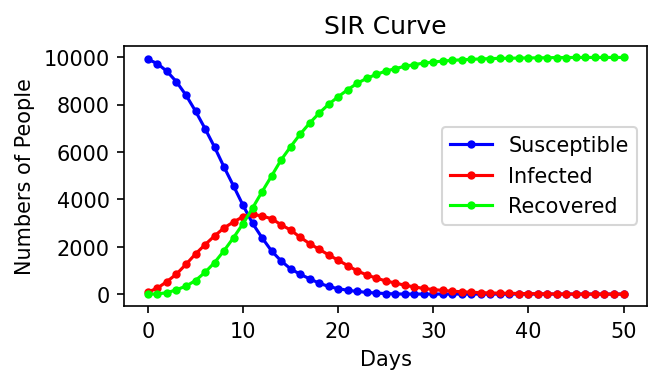

In [2]:
sir = Automata_SIR(100, 100)
# automata.printMatrix(cmap_SIR, labels_SIR)
print(f"Total People: {sir.numpeople}")
print(f"Initial Patient Number: {sir.getI()}")
sir.accumulateData()
for n in range(50):
    sir.nextGeneration()
    sir.accumulateData()
# sir.printMatrix(cmaps["SIR"], labels["SIR"])
sir.plotCurve()

## Cellular Automata (SEIR)

Total People: 10000
Initial Patient Number: 115


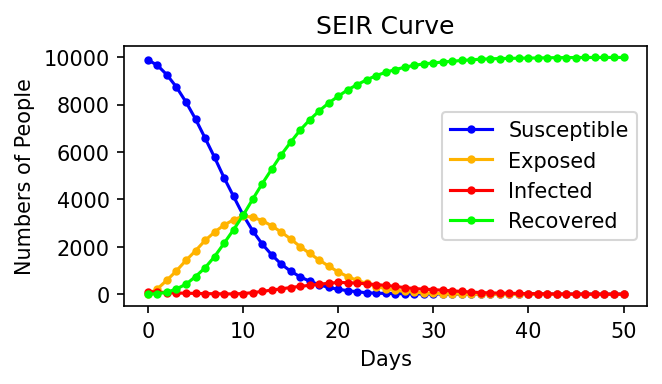

In [3]:
seir = Automata_SEIR(100, 100)
print(f"Total People: {seir.numpeople}")
print(f"Initial Patient Number: {seir.getI()}")
seir.accumulateData()
for n in range(50):
    seir.nextGeneration()
    seir.accumulateData()
# seir.printMatrix(cmaps["SEIR"], labels["SEIR"])
seir.plotCurve()

## Cellular Automata (SEIRD)

Total People: 10000
Initial Patient Number: 93


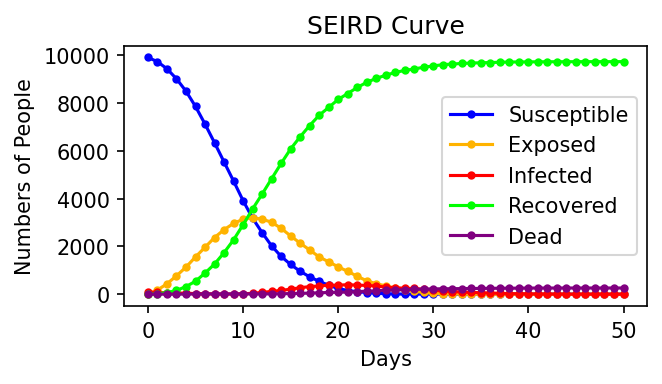

In [4]:
seird = Automata_SEIRD(100, 100)
print(f"Total People: {seird.numpeople}")
print(f"Initial Patient Number: {seird.getI()}")
seird.accumulateData()
for n in range(50):
    seird.nextGeneration()
    seird.accumulateData()
# seird.printMatrix(cmaps["SEIRD"], labels["SEIRD"])
seird.plotCurve()

# Progress/Colaboration
[COVID Simulation Project Github](https://github.gatech.edu/phsu40/CSE6730-Covid-Simulation.git)

 We managed to store our code through Github and work daily on the project through VSCode's Live-Share extension. In terms of the progress, we had accomplished until this checkpoint was to explore various simulation models, such as SIR, SEIR, SEIRS, SEIRS, etc. These models were based on several references, including codes [6] and conceptual ideas [3][4] that helped us constructed these models and classes in Python. Our models were able to plot the Simulation curves, such as the SEIR curve through the constants and parameters we input. The displaying curves and plots do match our expectation of SIR-based models [5] would exhibit. In addition, we factored in attributes such as Death and incubation days [5] to further examine the correctness and possible outcomes to our models. That is to say, we are trying to have a comprehensive understanding of what model we would want to build our agent-based model on for our final project goal. 
 
 During the progress we made for this checkpoint, we also decided on details about our agent-based model. We have found a reference model [1] that we could build our ABS (Agent-Based Simulation) on with several essential modifications. These modifications include the design pattern of how individuals would interact on a high level and the impact of the personal protective equipment would have on the pandemic. 

# Division of Labor
All the work was done collaboratively and synchronously. Everyone shares an equal amount of the workload during this project.

# FutureWork:
| Timeline                          |   Objectives                                       |
|:---------------------------------:|:-------------------------------------------------- |
| Period 1<br/>(~ 4/11)             | 1. Build models for SIR, SEIR(D), SEIRS(D)<br/> 2. Evaluate the correctness of the models<br/>3. Project Checkpoint<br/>4. Conceptual model for Agent-Based Simulation model |
| Period 2<br/>(4/12 ~ 4/18)        | 1. Build SEIR Agent-Based Model with hourly-based 2D-square grid<br/>2. Utilize case studies to examine the correctness of the ABM<br/>3. Document the results of the ABM |
| Period 3<br/>(4/19 ~ 4/26)        | 1. Possible future model building on hex grid configuration<br/>2. Modify the model after doing the case-study analysis <br/>3. Comparing the results to real-world pandemic situation |

# Reference: 
 * [1] [COVID-ABS: An agent-based model of COVID-19 epidemic to simulate health and economic effects of social distancing interventions](https://reader.elsevier.com/reader/sd/pii/S0960077920304859?token=315C3393A6229C5AB8B7E8566F6E4E5B127349BA76D369BBD3D20C20B63D7040A503CE8FE00D08BE6C459A2C817C57DC&originRegion=us-east-1&originCreation=20210411164718) [Source Code](https://github.com/petroniocandido/COVID19_AgentBasedSimulation)
 * [2] [Modeling and forecasting of COVID-19 using a hybrid dynamic model based on SEIRD with ARIMA corrections](https://www.sciencedirect.com/science/article/pii/S2468042720301032)
 * [3] [Measuring and Preventing COVID-19 Using the SIR Model and Machine Learning in Smart Health Care](https://www.hindawi.com/journals/jhe/2020/8857346/)
 * [4] [A Simulation of a COVID-19 Epidemic Based on a Deterministic SEIR Model](https://www.frontiersin.org/articles/10.3389/fpubh.2020.00230/full)
 * [5] [SEIR and SEIRS models](https://docs.idmod.org/projects/emod-hiv/en/latest/model-seir.html)
 * [6] [Simulate Covid-19 in your area with Python — beyond SIR models (Individual-Based-Simulation)](https://towardsdatascience.com/model-the-covid-19-epidemic-in-detail-with-python-98f0d13f3a0e)
 * [7] [Modeling COVID-19 scenarios for United States (mask no mask, death rate, SEIR)](https://www.nature.com/articles/s41591-020-1132-9#Sec7)
 * [8] [Python Coronavirus Simulation](https://github.com/paulvangentcom/python_corona_simulation)
 * [9] [A model based on cellular automata to estimate the social isolation impact on COVID-19 spreading in Brazil](*https://www.sciencedirect.com/science/article/pii/S0169260720316655)